# Importing the Required Libraries

In [3]:
# ! pip install opencv-python numpy albumentations pandas 

# ! pip install plotly


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os  
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
from tqdm import tqdm



In [ ]:
# Define paths

DATASET_PATH = r"D:\Projects\Disease_Detection\xray_images"  # Update with actual dataset path
IMAGES_PATH = os.path.join(DATASET_PATH, "images")  # Folder where original images are stored
GROUND_TRUTH_PATH = r"D:\Projects\Disease_Detection\Ground_Truth.csv"
OUTPUT_PATH = r"D:\Projects\Disease_Detection\yolov5\data_yolo"

YOLO_LABELS_PATH = os.path.join(OUTPUT_PATH, "labels")
YOLO_IMAGES_PATH = os.path.join(OUTPUT_PATH, "images")

# Create output directories
os.makedirs(YOLO_LABELS_PATH, exist_ok=True)
os.makedirs(YOLO_IMAGES_PATH, exist_ok=True)


# Load dataset
df = pd.read_csv(r"D:\Projects\Disease_Detection\Ground_Truth.csv")

# Define image size for YOLO (resize)
IMG_SIZE = 640

# Define augmentation transformations
augmentations = A.Compose([
    A.Rotate(limit=10, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

# Define disease labels (Map to YOLO class IDs)
disease_labels = {
    "Atelectasis": 0, "Effusion": 1, "Mass": 2, "Infiltration": 3, 
    "Pneumonia": 4, "Nodule": 5, "Pneumothorax": 6, "Consolidation": 7,
    "Edema": 8, "Emphysema": 9, "Fibrosis": 10, "Pleural_Thickening": 11,
    "Hernia": 12
}

def preprocess_image(image_path):
    """ Preprocess an X-ray image: grayscale conversion, normalization, resizing. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if image is None:
        return None
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to 640x640
    image = image / 255.0  # Normalize pixel values (0 to 1)

    # Save processed image
    
    output_img_path = os.path.join(YOLO_IMAGES_PATH, os.path.basename(image_path))
    cv2.imwrite(output_img_path, (image * 255).astype(np.uint8))
    
    return output_img_path

def apply_augmentation(image_path):
    """ Apply augmentation and save augmented images. """
    image = cv2.imread(image_path)
    if image is None:
        return
    augmented = augmentations(image=image)['image']

    # Save augmented image
    
    aug_image_path = os.path.join(YOLO_IMAGES_PATH, "aug_" + os.path.basename(image_path))
    cv2.imwrite(aug_image_path, augmented)

def convert_to_yolo_format(image_name, labels):
    """ Convert disease labels to YOLO format with dummy bounding box. """
    
    yolo_annotations = []
    for disease in labels:
        if disease in disease_labels:
            class_id = disease_labels[disease]
            
            # Dummy bounding box (full image)
            
            yolo_annotations.append(f"{class_id} 0.5 0.5 1.0 1.0") 

    return "\n".join(yolo_annotations)

def process_dataset(df):
    """ Process images and labels, then save in YOLO format. """
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        image_name = row["Image Index"]
        image_path = os.path.join(IMAGES_PATH, image_name)

        # Skip if image does not exist
        if not os.path.exists(image_path):
            continue

        # Preprocess & augment image
        preprocess_image(image_path)
        apply_augmentation(image_path)

        # Convert multi-labels to YOLO format
        labels = row["Finding Labels"].split("|")  # Multi-label splitting
        yolo_annotations = convert_to_yolo_format(image_name, labels)

        # Save YOLO annotation file
        if yolo_annotations:
            label_file = os.path.join(YOLO_LABELS_PATH, image_name.replace('.png', '.txt'))
            with open(label_file, "w") as f:
                f.write(yolo_annotations)

# Run processing pipeline
process_dataset(df)

print("✅ Data Preprocessing Completed: Images processed and YOLO annotations saved.")


100%|██████████| 111010/111010 [00:21<00:00, 5092.63it/s]

✅ Data Preprocessing Completed: Images processed and YOLO annotations saved.


In [ ]:
imges = os.listdir(YOLO_IMAGES_PATH)

NameError: name 'os' is not defined

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import albumentations as A

# Define Paths
DATASET_PATH = r"D:\Projects\Disease_Detection\xray_images"
CSV_FILE = r"D:\Projects\Disease_Detection\Ground_Truth.csv"

# YOLO dataset structure
YOLO_DATASET_PATH = r"D:\Projects\Disease_Detection\yolov5\data_yolo"
YOLO_IMAGES_PATH = os.path.join(YOLO_DATASET_PATH, "images", "train")
YOLO_LABELS_PATH = os.path.join(YOLO_DATASET_PATH, "labels", "train")

# Create necessary directories
os.makedirs(YOLO_IMAGES_PATH, exist_ok=True)
os.makedirs(YOLO_LABELS_PATH, exist_ok=True)

# Load dataset
df = pd.read_csv(CSV_FILE)

# Define image size for YOLO
IMG_SIZE = 1024

# Define augmentation transformations
augmentations = A.Compose([
    A.Rotate(limit=10, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

# Define disease labels mapping
disease_labels = {
    "Atelectasis": 0, "Effusion": 1, "Mass": 2, "Infiltration": 3, 
    "Pneumonia": 4, "Nodule": 5, "Pneumothorax": 6, "Consolidation": 7,
    "Edema": 8, "Emphysema": 9, "Fibrosis": 10, "Pleural_Thickening": 11,
    "Hernia": 12
}

def preprocess_image(image_path, save_path):
    """ Preprocess an X-ray image: grayscale conversion, normalization, resizing. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None

    # Resize and normalize
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0

    # Save preprocessed image
    cv2.imwrite(save_path, (image * 255).astype(np.uint8))
    return save_path

def apply_augmentation(image_path, save_path):
    """ Apply augmentation and save augmented images. """
    image = cv2.imread(image_path)
    if image is None:
        return

    augmented = augmentations(image=image)['image']
    cv2.imwrite(save_path, augmented)

def generate_synthetic_bbox(image_size=(1024, 1024)):
    """ Generate synthetic bounding boxes for an image. """
    x_min = np.random.randint(100, 300)
    y_min = np.random.randint(100, 300)
    x_max = np.random.randint(400, 600)
    y_max = np.random.randint(400, 600)
    return x_min, y_min, x_max, y_max

def convert_to_yolo_format(row, img_width=1024, img_height=1024):
    """ Convert bounding boxes to YOLO format. """
    x_center = (row['x_min'] + row['x_max']) / 2.0 / img_width
    y_center = (row['y_min'] + row['y_max']) / 2.0 / img_height
    width = (row['x_max'] - row['x_min']) / img_width
    height = (row['y_max'] - row['y_min']) / img_height
    return f"{row['class_id']} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"

def process_dataset(df):
    """ Process images and save labels in YOLO format. """
    annotations = {}

    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        image_name = row["Image Index"]
        image_path = os.path.join(DATASET_PATH, image_name)
        save_image_path = os.path.join(YOLO_IMAGES_PATH, image_name)

        # Skip if image does not exist
        if not os.path.exists(image_path):
            continue

        # Preprocess & augment image
        preprocess_image(image_path, save_image_path)
        apply_augmentation(image_path, os.path.join(YOLO_IMAGES_PATH, "aug_" + image_name))

        # Convert multi-labels to YOLO format
        labels = row["Finding Labels"].split("|")
        yolo_annotations = []

        for disease in labels:
            if disease in disease_labels:
                class_id = disease_labels[disease]
                x_min, y_min, x_max, y_max = generate_synthetic_bbox()
                bbox_data = convert_to_yolo_format({
                    'class_id': class_id, 
                    'x_min': x_min, 'y_min': y_min, 
                    'x_max': x_max, 'y_max': y_max
                })
                yolo_annotations.append(bbox_data)

        # Save YOLO annotation file
        if yolo_annotations:
            label_file = os.path.join(YOLO_LABELS_PATH, image_name.replace('.png', '.txt'))
            with open(label_file, "w") as f:
                f.write("\n".join(yolo_annotations))

# Run processing pipeline
process_dataset(df)

print("✅ Data Preprocessing Completed: Images processed and YOLO annotations saved.")


  3%|▎         | 3478/111010 [04:00<2:03:48, 14.47it/s]


KeyboardInterrupt: 

In [17]:
! git clone https://github.com/ultralytics/yolov5.git --depth 1


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [18]:
# ! pip install -r "D:\Projects\Disease_Detection\yolov5\yolov5\requirements.txt"

In [10]:
!python train.py --img 1024 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --hyp hyp.scratch.yaml


python: can't open file 'd:\\Projects\\Disease_Detection\\train.py': [Errno 2] No such file or directory


In [ ]:
! python "D:\Projects\Disease_Detection\yolov5\data_yolo\train.py" --img 1024 --batch 16 --epochs 20 --data train_data.yaml --weights yolov5s.pt --device 0


Traceback (most recent call last):
  File "D:\Projects\Disease_Detection\yolov5\data_yolo\train.py", line 47, in <module>
    import yolov5.data_yolo.val as validate  # for end-of-epoch mAP
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'yolov5.data_yolo'


In [4]:
# Load the dataset


df = pd.read_csv("Ground_Truth.csv")

In [5]:
# Exploding multiple conditions for better analysis

df_exploded = df.assign(Finding_Labels=df["Finding Labels"].str.split("|")).explode("Finding_Labels")

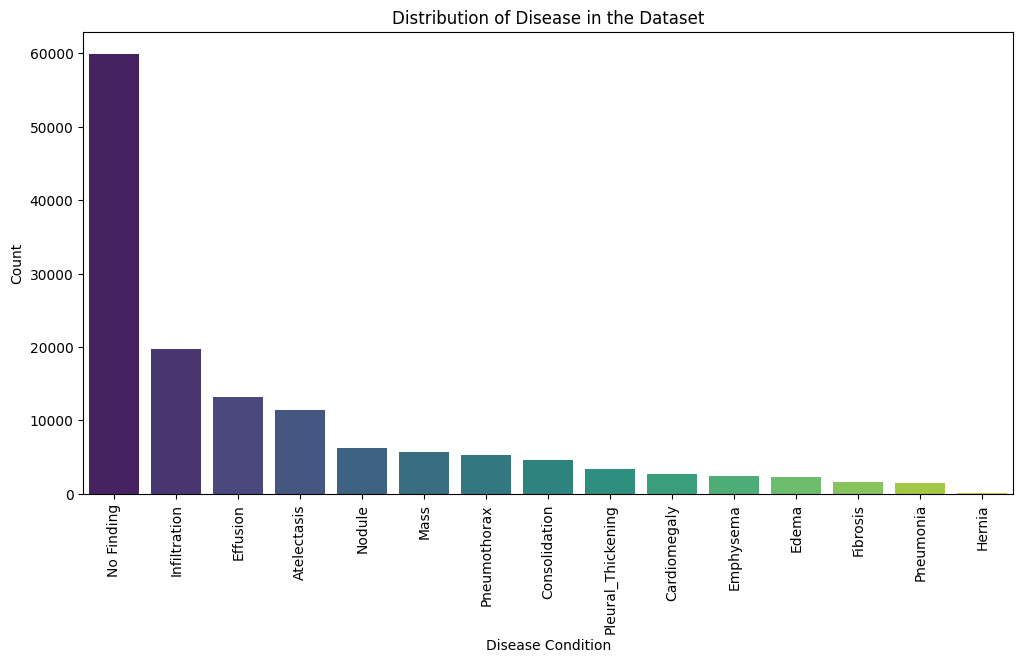

In [6]:
# 1. Distribution of Conditions

plt.figure(figsize=(12, 6))
condition_counts = df_exploded["Finding_Labels"].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Disease Condition")
plt.ylabel("Count")
plt.title("Distribution of Disease in the Dataset")
plt.show()

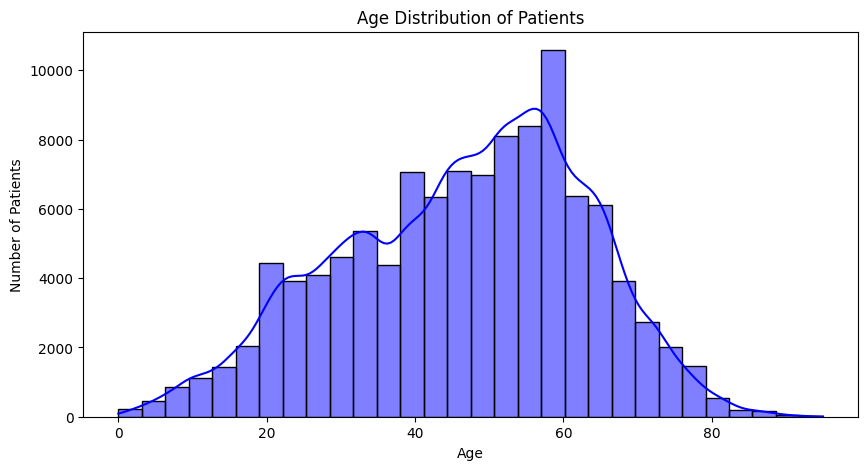

In [7]:
# 2. Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df["Patient Age"], bins=30, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Patients")
plt.show()

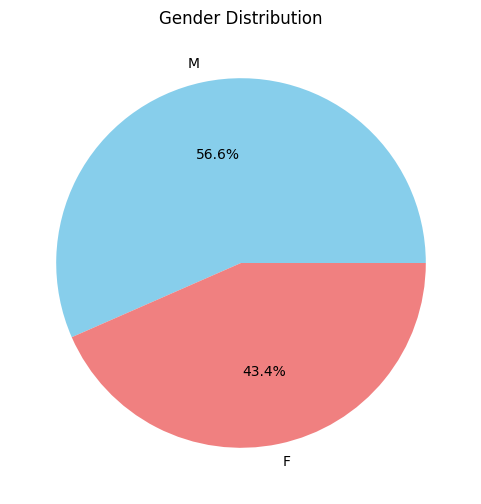

In [8]:
# 3. Gender Distribution

gender_counts = df["Patient Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Gender Distribution")
plt.show()


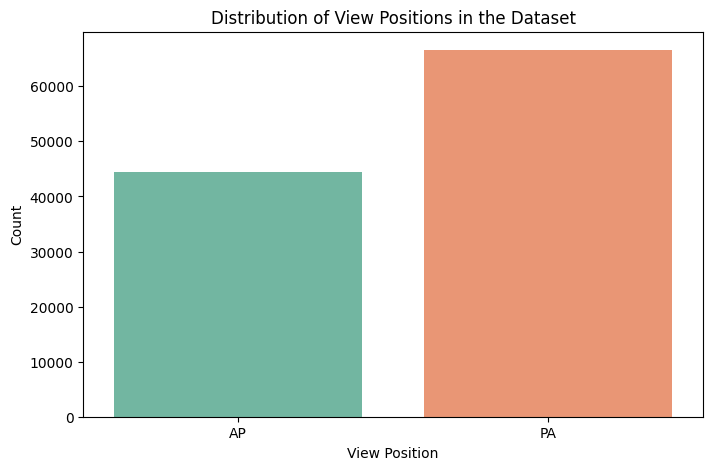

In [9]:
# 4. View Position Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x=df["View Position"], palette="Set2")
plt.xlabel("View Position")
plt.ylabel("Count")
plt.title("Distribution of View Positions in the Dataset")
plt.show()